In [10]:
import numpy as np
import matplotlib.pyplot as plt
import mplhep as hep
from matplotlib.offsetbox import AnchoredText
from coffea.util import load
from coffea.hist import plot
from coffea import hist
import re
import argparse
import json
import math
import os

plt.style.use(hep.style.ROOT)

data_err_opts = {
    'linestyle': 'none',
    'marker': '.',
    'markersize': 10.,
    'color': 'k',
    'elinewidth': 1,
}
from cycler import cycler
import matplotlib as mpl
# colors=["#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5","#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50","#8BC34A","#CDDC39","#FFEB3B","#FFC107","#FF9800","#FF5722","#795548","#BDBDBD","#9E9E9E","#616161","#90BED4","#607D8B","#455A64"]

colors = ["#5F4690","#1D6996","#38A6A5","#0F8554","#73AF48","#EDAD08","#E17C05","#CC503E","#94346E","#666666","#6F4070","#994E95"]
mpl.rcParams["axes.prop_cycle"] = cycler('color', colors)
label_mc= ["DYLL_m10to50","DYLL_m50","DY_taus","ST-s_lep","ST-t","ST-at","atW","tW","tt-dilep","tt-semilep","WJetsLNu","WW","WZ","ZZ","Hc-WW2L2Nu*10e4","Hc-WW2QLNu*10e4","Hc-ZZ2L2Nu*10e4","Hc-ZZ2L2Q*10e4"]
from matplotlib.offsetbox import AnchoredText
from utils.xs_scaler import scale_xs

with open('metadata/mergemap.json') as json_file:  
    merge_map = json.load(json_file)
with open('metadata/plotmap.json') as pltf:
    var_map = json.load(pltf)

In [3]:
import pandas as pd
xs_dict={'gchcWW2QLNu':0.175*0.6741*0.3258*0.2137,'gchcWW2L2Nu':0.175*0.3258*0.3258*0.2137,'gchcZZ2L2Nu':0.175*0.100974*0.2*0.02641,'gchcZZ2L2Q':0.175*0.100974*0.69911*0.02641,'GluGluHToWWToLNuQQ_M125_TuneCP5_PSweight_13TeV-powheg2-jhugen727-pythia8':48.58*0.6741*0.3258*0.2137,'GluGluHToWWTo2L2Nu_M-125_TuneCP5_13TeV-powheg-jhugen727-pythia8':48.58*0.3258*0.3258*0.2137,'GluGluHToZZTo2L2Q_M125_TuneCP5_13TeV_powheg2_JHUGenV7011_pythia8':48.58*0.100974*0.69911*0.02641,'GluGluHToZZTo2L2Nu_M125_TuneCP5_13TeV_powheg2_JHUGenV735_pythia8':48.58*0.100974*0.2*0.02641}
# print(output)
lumi= 41500 

# HZZ2l2q={'gchcWW2QLNu':{'all': 22652.0, 'global selection': 1307, 'dr': 310, 'mjj mass': 278, 'dphi mT': 278, 'tag one jets': 261, 'jet eff': 261, 'electron eff': 114, 'muon eff': 150}, 'gchcZZ2L2Q':  {'all': 63366.0, 'global selection': 2376, 'dr': 393, 'mjj mass': 342, 'dphi mT': 342, 'tag one jets': 251, 'jet eff': 251, 'electron eff': 125, 'muon eff': 128}, 'gchcZZ2L2Nu':  {'all': 45100.0, 'global selection': 5813, 'dr': 702, 'mjj mass': 601, 'dphi mT': 601, 'tag one jets': 434, 'jet eff': 434, 'electron eff': 234, 'muon eff': 210}, 'gchcWW2L2Nu': {'all':  45160.0, 'global selection': 8410, 'dr': 1235, 'mjj mass': 1076, 'dphi mT': 1076, 'tag one jets': 954, 'jet eff': 954, 'electron eff': 453, 'muon eff': 552}}
# output2 = load('hists_HWW2qlnu_higgsggH_UL17.coffea')
# print(output2)

HZZ2l2q =  {'gchcWW2QLNu':  {'all': 15296.0, 'global selection': 1, 'signal region selection': 1, 'dilepton mass': 1, 'selected jets': 1, 'electron selection': 0, 'muon selection': 0}, 'gchcZZ2L2Q':  {'all': 16870.0, 'global selection': 2144, 'signal region selection': 1880, 'dilepton mass': 1856, 'selected jets': 1315, 'electron selection': 744, 'muon selection': 909}, 'gchcZZ2L2Nu':  {'all': 17395.0, 'global selection': 2659, 'signal region selection': 2304, 'dilepton mass': 2212, 'selected jets': 1695, 'electron selection': 870, 'muon selection': 982}, 'gchcWW2L2Nu':  {'all': 115759.0, 'global selection': 4311, 'signal region selection': 4100, 'dilepton mass': 252, 'selected jets': 190, 'electron selection': 53, 'muon selection': 50}}
wei = {}
for xs in HZZ2l2q.keys():
    #All(include tau)
    wei[xs]=xs_dict[xs]*lumi/HZZ2l2q[xs]['all']
#     print(xs,wei[xs])
    for items in HZZ2l2q[xs].keys():
        HZZ2l2q[xs][items] = wei[xs]*HZZ2l2q[xs][items]
#         print(HZZ2l2q[xs][items]/HZZ2l2q[xs]['all'])
# print(HZZ2l2q['gchcWW2QLNu']['all'])
# print(type(HZZ2l2q))
# from_dict(your_dict,orient='index')
pd.DataFrame.from_dict(HZZ2l2q)

,gchcWW2QLNu,gchcZZ2L2Q,gchcZZ2L2Nu,gchcWW2L2Nu
all,340.852179,13.539718,3.873416,164.737635
global selection,0.022284,1.720756,0.592090,6.135021
signal region selection,0.022284,1.508872,0.513041,5.834746
dilepton mass,0.022284,1.489610,0.492555,0.358623
selected jets,0.022284,1.055408,0.377433,0.270391
electron selection,0.000000,0.597128,0.193726,0.075425
muon selection,0.000000,0.729556,0.218666,0.071155


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/hist_tools.py:377: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7fa538ba1210>
  "Not all requested indices present in %r" % self, RuntimeWarning
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/hist_tools.py:377: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7fa53897f690>
  "Not all requested indices present in %r" % self, RuntimeWarning


0.05128035732899772 0.00035535276838608975


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:427: RuntimeWarning: invalid value encountered in true_divide
  rsumw = sumw_num / sumw_denom
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:439: RuntimeWarning: invalid value encountered in true_divide
  poisson_interval(rsumw, sumw2_num / sumw_denom**2) - rsumw
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:458: RuntimeWarning: invalid value encountered in true_divide
  denom_unc = poisson_interval(unity, sumw2_denom / sumw_denom**2)


0.030105873476392667 0.00016766525021515068


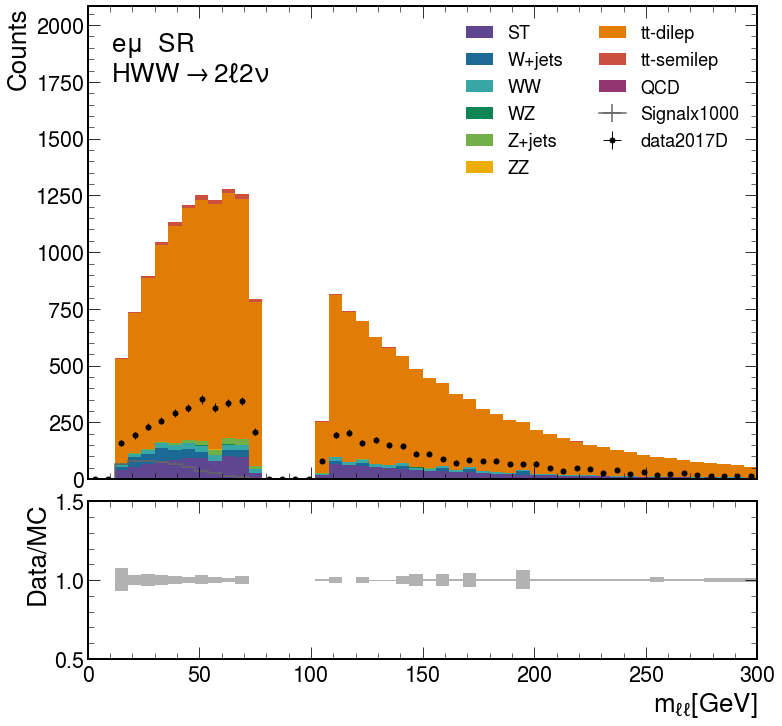

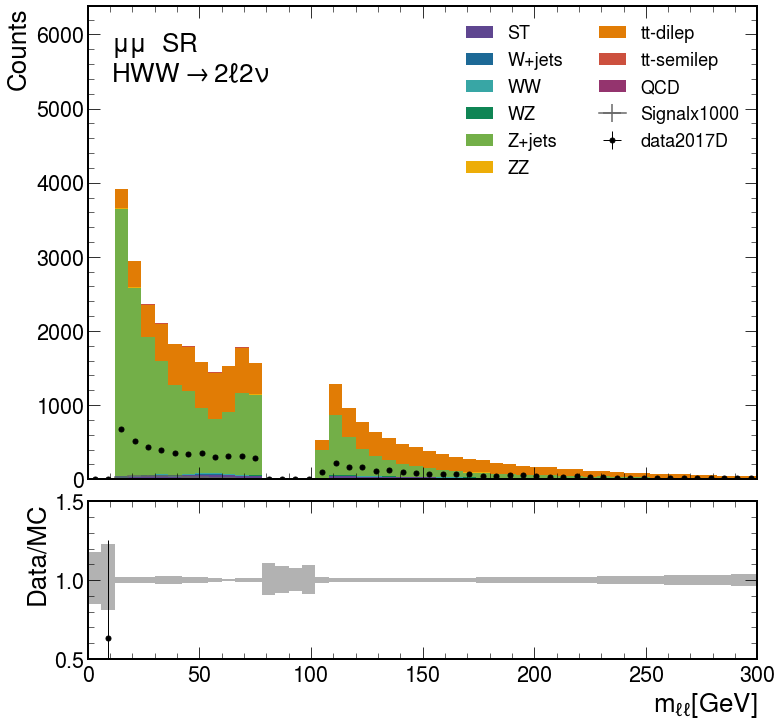

In [3]:
outputWWl_s = load('hists_HWW2l2nu_signal_UL17.coffea')
outputWWl_b = load('hists_HWW2l2nu_mcbkg_UL17.coffea')
# outputWWl_b2 = load('hists_HWW2l2nu_mcbkg_UL17small.coffea')
outputWWl_data = load('hists_HWW2l2nu_dataD.coffea') 
outputWWl_qcd = load('hists_HWW2l2nu_qcd.coffea')
# print(outputWWl_data)
# outputWWl_b2 = load('hists_HWW2l2nu_minorbkg_UL17small.coffea')
# print(outputWWl_b2)
# outputWWl_data = load('hists_HWW2qlnu_singleD.coffea')
eventWWl_s = outputWWl_s['sumw']
eventWWl_b = outputWWl_b['sumw']
eventWWl_qcd = outputWWl_qcd['sumw']
# eventWWl_b2=outputWWl_b2['sumw']
os.makedirs('/eos/user/m/milee/www/HWW2l2nu/', exist_ok=True)
ch = ['emu','mumu']
regions = ['SR']
for var in ['ll_mass']:#['mT2','mT1','mTh','ll_mass','ll_pt','MET_pt','jetflav_pt','jetflav_btagDeepFlavCvL','jetflav_btagDeepFlavCvB']:#outputWWl_b.keys():   
    
    outputWWl_s[var]=scale_xs(outputWWl_s[var],4319*1000,eventWWl_s)
    outputWWl_b[var]=scale_xs(outputWWl_b[var],4319,eventWWl_b)
#     outputWWl_b2[var]=scale_xs(outputWWl_b2[var],4319,eventWWl_b2)
    outputWWl_qcd[var]=scale_xs(outputWWl_qcd[var],4319,eventWWl_qcd)
    
    outputWWl_b[var]=outputWWl_b[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
#     outputWWl_b2[var]=outputWWl_b2[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
    outputWWl_qcd[var]=outputWWl_qcd[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hww_MC'])
    outputWWl_data[var]=outputWWl_data[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['data'])

    if var == 'nbj' or var == 'ncj' or 'jetpt_' in var or 'jetcsv_' in var  or 'jetpn_' in var or 'dr' in var or var=='MET_covXY' : continue    
    if var == 'cutflow':break
    
    for chs in ch:
        for region in regions:
            fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
            fig.subplots_adjust(hspace=.07)  

            if 'jet' in var:
                ax = plot.plot1d(outputWWl_b[var].sum("flav").integrate("lepflav",chs).integrate('region',region),overlay="plotgroup",stack=True,ax=ax)
                hdata = outputWWl_data[var].sum("flav").integrate("lepflav",chs).integrate('region',region).integrate('plotgroup','data_%s'%(chs))
                plot.plot1d(hdata,clear=False,error_opts=data_err_opts,ax=ax)
                plot.plot1d(outputWWl_s[var].sum("flav").integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu'),clear=False,ax=ax)
                rax = plot.plotratio(num=hdata,
                                            denom=outputWWl_b[var].sum("plotgroup").sum("flav").integrate("lepflav",chs).integrate('region',region),
                                                    ax=rax,
                                                    error_opts=data_err_opts,
                                                    denom_fill_opts={},                                              
    #                                       
                                                    unc='num',
                                                clear=False
                                                    )
                rax.set_ylim(0.5,1.5)
            else: 
                
                print(sum(outputWWl_s[var].integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu').values()[()])/10000.,sum(outputWWl_s[var].integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu').values()[()])/10000./math.sqrt((sum(outputWWl_b[var].integrate("lepflav",chs).integrate('region',region).sum('plotgroup').values()[()])+sum(outputWWl_qcd[var].integrate("lepflav",chs).integrate('region',region).sum('plotgroup').values()[()]))))
                
                ax = plot.plot1d(outputWWl_b[var].integrate("lepflav",chs).integrate('region',region),overlay='plotgroup',stack=True,ax=ax)
                ax = plot.plot1d(outputWWl_qcd[var].integrate("lepflav",chs).integrate('region',region),overlay='plotgroup',stack=True,clear=False,ax=ax)
#                 ax = plot.plot1d(outputWWl_b2[var].integrate("lepflav",chs).integrate('region',region),overlay='plotgroup',stack=True,clear=False,ax=ax)

                plot.plot1d(outputWWl_s[var].integrate("lepflav",chs).integrate('region',region).integrate('dataset','gchcWW2L2Nu'),clear=False,ax=ax)

                hdata = outputWWl_data[var].integrate("lepflav",chs).integrate('region',region).integrate('plotgroup','data_%s'%(chs))
                plot.plot1d(hdata,clear=False,error_opts=data_err_opts,ax=ax)
                rax = plot.plotratio(num=hdata,
                                                    denom=outputWWl_b[var].sum("plotgroup").integrate('region',region).integrate("lepflav",chs).add(outputWWl_qcd[var].integrate("lepflav",chs).integrate('region',region).sum("plotgroup")),
                                                    ax=rax,
                                                    error_opts=data_err_opts,
                                                    denom_fill_opts={},    
                                                    unc='num',
                                                    clear=False)
            rax.set_ylim(0.5,1.5)
            rax.set_ylabel('Data/MC')
            rax.set_xlabel(var_map[var])
            ax.set_xlabel('')
            chl = chs
            if chs =='mumu' :chs='$\mu\mu$'
            if chs =='emu' :chs='e$\mu$'
            at = AnchoredText(chs+"  "+region+"\n" +r"HWW$\rightarrow 2\ell 2\nu$"                                                         
                                        , loc='upper left',frameon=False)
            ax.add_artist(at)
            leg_label = ax.get_legend_handles_labels()[1]
            leg_label[-1]='data2017D'
            leg_label[-2]='Signalx1000'
            ax.legend(loc="upper right",handles=ax.get_legend_handles_labels()[0],ncol=2,labels=leg_label,fontsize=18)
            hep.mpl_magic(ax= ax)
            fig.savefig("/eos/user/m/milee/www/HWW2l2nu/%s_%s_%s.pdf" %(chl,region,var))
            fig.savefig("/eos/user/m/milee/www/HWW2l2nu/%s_%s_%s.png" %(chl,region,var))
            


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/hist_tools.py:377: RuntimeWarning: Not all requested indices present in <Cat (name=dataset) instance at 0x7fb86d49ddd0>
  "Not all requested indices present in %r" % self, RuntimeWarning
/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:45: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,


0.00308233237409224
88561.5548465663 87216.0
0.0013163234173168407
35445.93445185975 38640.0


/afs/cern.ch/user/m/milee/.local/lib/python3.7/site-packages/coffea/hist/plot.py:45: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  RuntimeWarning,


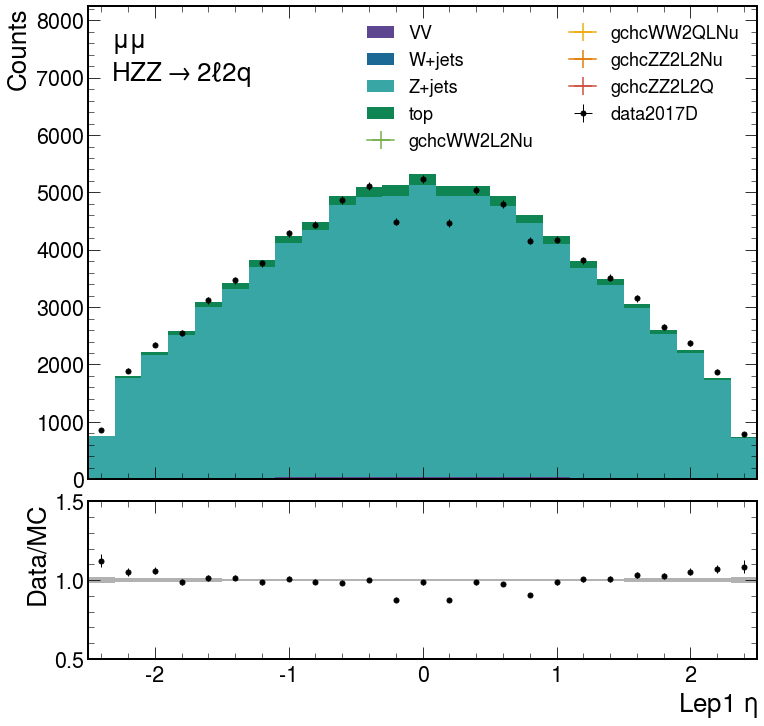

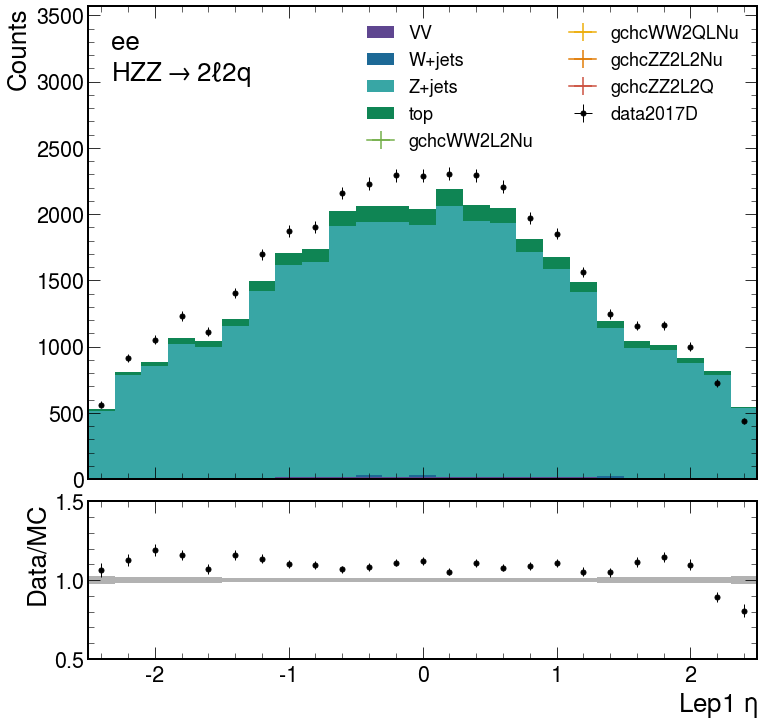

In [11]:
outputZZq_s = load('hists_HZZ2l2q_signal_UL17.coffea')
outputZZq_b = load('hists_HZZ2l2q_mcbkg_UL17.coffea')
outputZZq_data = load('hists_HZZ2l2q_dataD_noEG.coffea')
# print(outputZZq_data)
eventZZq_s = outputZZq_s['sumw']
eventZZq_b = outputZZq_b['sumw']
# print(outputZZq_data)
# with open('metadata/mergesample.json') as json_file:  
#     merge_map = json.load(json_file)
# collated = collate(outputZZq_b, merge_map)
ch = ['mumu','ee']
# print(outputZZq_s)
# label_mc.append("data")
os.makedirs('/eos/user/m/milee/www/HZZ2l2nu/', exist_ok=True)
for var in ['lep1_eta']:#outputZZq_b.keys():   
    
    outputZZq_s[var]=scale_xs(outputZZq_s[var],4319,eventZZq_s)
    outputZZq_b[var]=scale_xs(outputZZq_b[var],4319,eventZZq_b)
    outputZZq_b[var]=outputZZq_b[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['hzz_MC'])
    outputZZq_data[var]=outputZZq_data[var].group("dataset",hist.Cat("plotgroup", "plotgroup"),merge_map['data']) 
    if var == 'nbj' or var == 'ncj' or 'jetpt_' in var or 'jetcsv_' in var  or 'jetpn_' in var or var=='nj' or 'dr' in var or var=='MET_covXY'or var=='MET_sumEt' or var =='costheta_qq': continue    
    if var == 'cutflow':break
    for chs in ch:
        fig, ((ax),(rax)) = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        print(sum(outputZZq_s[var].integrate("lepflav",chs).integrate('dataset','gchcZZ2L2Nu').values()[()]))
#         print(math.sqrt(sum(outputZZq_b[var].integrate("lepflav",chs).sum('dataset').values()[()])),)
        print(sum(outputZZq_b[var].integrate("lepflav",chs).sum('plotgroup').values()[()]),sum(outputZZq_data[var].integrate("lepflav",chs).sum('plotgroup').values()[()]))
        fig.subplots_adjust(hspace=.07)        
        if 'jet_' in var:
            ax = plot.plot1d(outputZZq_b[var].sum("flav").integrate("lepflav",chs),overlay="plotgroup",stack=True,ax=ax)
            plot.plot1d(outputZZq_s[var].sum("flav").integrate("lepflav",chs),overlay="dataset",clear=False,ax=ax)

            plot.plot1d(outputZZq_data[var].sum("flav").integrate("lepflav",chs).sum("plotgroup"),clear=False,error_opts=data_err_opts,ax=ax)
            rax = plot.plotratio(                                      num=outputZZq_data[var].sum("plotgroup").sum("flav").integrate("lepflav",chs),
                                        denom=outputZZq_b[var].sum("plotgroup").sum("flav").integrate("lepflav",chs),
                                                ax=rax,
                                                error_opts=data_err_opts,
                                                denom_fill_opts={},                                              
#                                       
                                                unc='num',
                                            clear=False
                                                )
            rax.set_ylim(0.5,1.5)
        else: 
            
            ax = plot.plot1d(outputZZq_b[var].integrate("lepflav",chs),overlay="plotgroup",stack=True,ax=ax)
            plot.plot1d(outputZZq_s[var].integrate("lepflav",chs),overlay="dataset",clear=False,ax=ax)
            plot.plot1d(outputZZq_data[var].integrate("lepflav",chs).sum("plotgroup"),clear=False,error_opts=data_err_opts,ax=ax)
            
            rax = plot.plotratio(
	                                        num=outputZZq_data[var].sum("plotgroup").integrate("lepflav",chs),
                                                denom=outputZZq_b[var].sum("plotgroup").integrate("lepflav",chs),
                                                ax=rax,
                                                error_opts=data_err_opts,
                                                denom_fill_opts={},    
                                                unc='num',
                                                clear=False)
        rax.set_ylim(0.5,1.5)     
        rax.set_ylabel('Data/MC')
        rax.set_xlabel(var_map[var])
        ax.set_xlabel('')
        if chs =='mumu' :chs='$\mu\mu$'
    
        at = AnchoredText(chs+"\n" + r"HZZ$\rightarrow 2\ell 2q$"                                                         
                                        , loc='upper left',frameon=False)
        ax.add_artist(at)
        leg_label = ax.get_legend_handles_labels()[1]
        leg_label[-1]='data2017D'
#         leg_label[-2]='Signalx10e6'
        ax.legend(loc="upper right",handles=ax.get_legend_handles_labels()[0],ncol=2,labels=leg_label,fontsize=18)
        hep.mpl_magic(ax=ax)

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas
nplot=2
df = pandas.read_csv('test.csv')
fig = plt.figure()
ax = fig.add_subplot(111, projection = "3d")

ax.set_xlabel("x")
ax.set_ylabel("y") 
# ax.set_zlabel("z")
ax.set_xlim3d(0,len(df.index)*nplot+2)
ax.set_ylim3d(0,7) 

xpos = []
for b in range(nplot):
    for i in range(len(df.index)*nplot):
        xpos.append(1+2*i)
ypos = [1,1,1,5,5,5]
zpos = np.zeros(len(df.index)*nplot)

dx = np.ones(len(df.index)*nplot)
dy = np.ones(len(df.index)*nplot)
# print(len(df.index))
# print(df.columns)

# dz = [np.random.random(9) for i in range(4)]
dz = []
# for col in df.columns:
#     if col != 'index':
#         print(type(list(df[col])))

# dz = [list(df[col]) for col in df.columns if col != 'index']
# for r in range(len(df.index)):
#     z 
# print(dz)
_zpos = zpos   # the starting zpos for each bar
# # # colors = ['r', 'b', 'g', 'y']
color2=["#F44336","#E91E63","#9C27B0","#673AB7","#3F51B5","#2196F3","#03A9F4","#00BCD4","#009688","#4CAF50","#8BC34A","#CDDC39","#FFEB3B","#FFC107","#FF9800","#FF5722","#795548","#BDBDBD","#9E9E9E","#616161","#90BED4","#607D8B","#455A64"]
print(len(dz))
# for i in range(len(df.index)):
#     ax.bar3d(xpos, ypos, _zpos, dx, dy, dz[i], color=color2[i])
#     _zpos += dz[i]    # add the height of each bar to know where to start the next

# # # plt.gca().invert_xaxis()
# plt.show()
